<a href="https://colab.research.google.com/github/cho52o/Python_Application2020/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%ED%99%9C%EC%9A%A9_%EA%B3%BC%EC%A0%9C02_CarPrice%3C20181111%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/My Drive/3학년1학기/Python_Application/datasets_245550_518431_train-data.csv')
data.head(2)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


# 데이터 전처리

## 무의미한 변수 제거

> 'Unnamed: 0' 인덱스와 같음

> 'Name', 'Location' 매우 다양함. 때문에 어떤 특징을 이끌어내서 중고가와 연결 어려움.

> 'New_Price' 결측값이 너무 많음. 전체의 약 86.31%

In [ ]:
data.New_Price.isnull().sum() / data.shape[0]

0.8631001827546104

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


AxesSubplot(0.125,0.125;0.775x0.755)


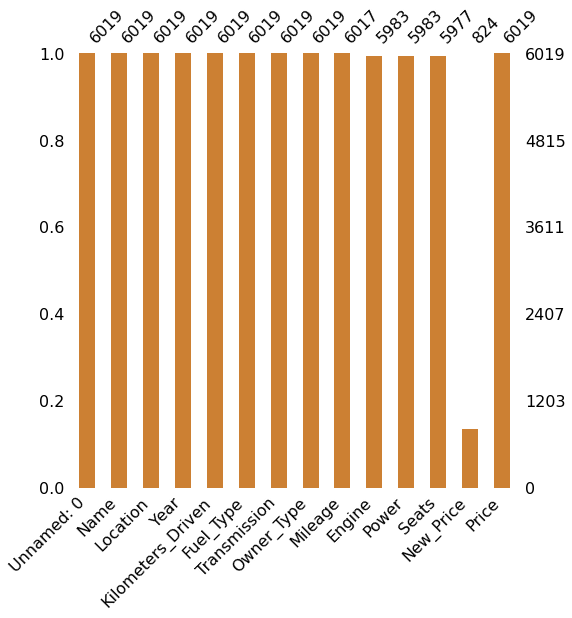

In [ ]:
import missingno as msno
print(msno.bar(df=data.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)))

In [ ]:
df = pd.DataFrame(data.iloc[:,[3,4,5,6,7,8,9,10,11,13]])
df.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


## 문자형 자료를 숫자형 자료로 변환

In [ ]:
df['Engine']=df['Engine'].str.replace('CC','').astype(float)
df['Mileage']=df['Mileage'].str.replace('kmpl','')
df['Mileage']=df['Mileage'].str.replace('km/kg','').astype(float)
df['Power']=df['Power'].str.replace('bhp','')
df['Power']=df['Power'].str.split(' ').str[0]
df['Power'][df['Power'] == 'null'] = np.NaN
df['Power']=df['Power'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50


In [ ]:
df.dtypes

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

## 범주형 자료를 숫자형 자료로 변환

In [ ]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
df['Fuel_Type'][df['Fuel_Type']=='Diesel'] = 1
df['Fuel_Type'][df['Fuel_Type']=='Petrol'] = 2
df['Fuel_Type'][df['Fuel_Type']=='CNG'] = 3
df['Fuel_Type'][df['Fuel_Type']=='LPG'] = 4
df['Fuel_Type'][df['Fuel_Type']=='Electric'] = 5
df['Fuel_Type']=df['Fuel_Type'].astype(int)
df['Transmission'][df['Transmission']=='Manual'] = 0
df['Transmission'][df['Transmission']=='Automatic'] = 1
df['Transmission']=df['Transmission'].astype(int)
df['Owner_Type'][df['Owner_Type']=='First'] = 1
df['Owner_Type'][df['Owner_Type']=='Second'] = 2
df['Owner_Type'][df['Owner_Type']=='Third'] = 3
df['Owner_Type'][df['Owner_Type']=='Fourth & Above'] = 4
df['Owner_Type']=df['Owner_Type'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
df.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75
1,2015,41000,1,0,1,19.67,1582.0,126.20,5.0,12.50


In [ ]:
df.dtypes

Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

## 결측값 제거

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6019 non-null   int64  
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   int64  
 3   Transmission       6019 non-null   int64  
 4   Owner_Type         6019 non-null   int64  
 5   Mileage            6017 non-null   float64
 6   Engine             5983 non-null   float64
 7   Power              5876 non-null   float64
 8   Seats              5977 non-null   float64
 9   Price              6019 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 470.4 KB


In [ ]:
df1 = df.dropna()
df1 = df1.reset_index(drop=True)
df1.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75
1,2015,41000,1,0,1,19.67,1582.0,126.20,5.0,12.50


In [ ]:
df1.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

## Price의 범주형 자료 만들기

> 75% 이상, 50% 이상, 25% 이상, 25% 이하

> 연속형 자료는 예측의 정확도가 떨어짐.

In [ ]:
df1.Price.describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

In [ ]:
n = df1.shape[0]
label = pd.DataFrame(index=df1.index,columns=['Class'])
for i in range(5872):
  j = df1.Price.loc[i]
  if j >= 10.000000:
    label.loc[i,'Class'] = "A"
  elif j >= 5.750000:
    label.loc[i,'Class'] = "B"
  elif j >= 3.517500:
    label.loc[i,'Class'] = "C"
  else:
    label.loc[i,'Class'] = "D"

In [ ]:
label['Class'].value_counts()

A    1485
D    1468
C    1466
B    1453
Name: Class, dtype: int64

In [ ]:
df2 = pd.merge(df1,label,left_on=df1.index,right_on=label.index).iloc[:,1:]
df2.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Class
0,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,D
1,2015,41000,1,0,1,19.67,1582.0,126.20,5.0,12.50,A


# 다중 선형 회귀분석

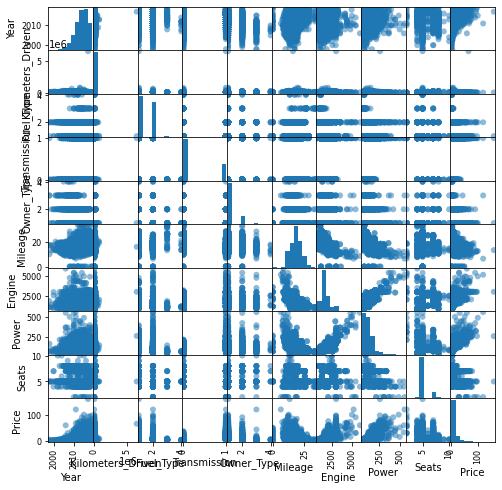

In [ ]:
# 산점도 행렬
p = pd.plotting.scatter_matrix(df2, figsize=(8, 8), marker='o')

In [ ]:
from statsmodels.formula.api import ols
reg_simp = ols('Price ~ Year + Fuel_Type + Transmission + Mileage + Engine + Power + Seats', data=df2).fit()
reg_simp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1912.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:23:31   Log-Likelihood:                -19054.
No. Observations:                5872   AIC:                         3.812e+04
Df Residuals:                    5864   BIC:                         3.818e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2086.1610     56.300    -37.054      0.000   -2196.530   -1975.792
Year             1.0376      0.028     36.902      0.000       0.982       1.093
Fuel_Type       -1.8900      0.201     -9.408      0.000      -2.284      -1.496
Transmission     2.6342      0.243     10.850      0.000       2.158       3.110
Mileage         -0.1327      0.030     -4.448      0.000      -0.191      -0.074
Engine           0.0012      0.000      2.958      0.003       0.000       0.002
Power            0.1249      0.004     31.797      0.000       0.117       0.133
Seats           -0.9559      0.137     -6.984      0.000      -1.224      -0.688
==============================================================================
Omnibus:                     4452.126   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           359805.135
Skew:                           2.983   Prob(JB):                         0.00
Kurtosis:                      40.882   Cond. No.                     1.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Train & Test data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
### 입력변수(x)와 출력변수(y)
x = df2[['Year','Fuel_Type','Transmission','Mileage','Engine','Power','Seats']]
x_std = StandardScaler().fit_transform(x)
y = df2.Class

In [ ]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x_std,y,test_size=0.4,shuffle=False,random_state=20181111)

# 서포트 벡터 머신(SVM)

In [ ]:
from sklearn.svm import SVC

## 선형분류(linear)

In [ ]:
### SVM
svc = SVC(kernel='linear', C=1, gamma=1)
model = svc.fit(x_train, y_train)

In [ ]:
### 예측
y_pred = model.predict(x_test)
y_pred

array(['B', 'C', 'C', ..., 'B', 'D', 'D'], dtype=object)

In [ ]:
### accuracy
model.score(x_test, y_test)

0.7343550446998723

In [ ]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,A,B,C,D
Class,,,,
A,498,69,3,0
B,54,404,131,3
C,8,114,373,108
D,1,14,119,450


In [ ]:
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = {'kernel': ['linear'],
                    'C': [0.01, 0.1, 1, 10, 50, 100, 500 ,1000],
                    'gamma': [0.01, 0.05, 0.1, 0.5, 1, 10 , 50]}

In [ ]:
grid = GridSearchCV(SVC(), tuned_parameters)
%time grid.fit(x_train, y_train)

CPU times: user 12min 23s, sys: 116 ms, total: 12min 23s
Wall time: 12min 24s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100, 500, 1000],
                         'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 50],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'C': 500, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
### SVM
# svc = SVC(kernel="linear",C=500, gamma=0.01)
svc = SVC(kernel="linear",C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
model = svc.fit(x_train, y_train)

In [ ]:
### 예측
y_pred = model.predict(x_test)

In [ ]:
### accuracy
model.score(x_test, y_test)

0.7318007662835249

In [ ]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,A,B,C,D
Class,,,,
A,495,73,2,0
B,54,401,134,3
C,8,112,377,106
D,1,14,123,446


## 비선형분류(rbf)

In [ ]:
### SVM
svc = SVC(kernel="rbf",C=1, gamma=1)
model = svc.fit(x_train, y_train)

In [ ]:
### 예측
y_pred = model.predict(x_test)

In [ ]:
### accuracy
model.score(x_test, y_test)

0.7692635163899532

In [ ]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,A,B,C,D
Class,,,,
A,519,49,2,0
B,52,402,135,3
C,8,81,434,80
D,5,12,115,452


In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'kernel': ['rbf'],
                    'C': [0.01, 0.1, 1, 10, 50],
                    'gamma': [0.1, 0.5, 1, 10, 50]}

In [ ]:
grid = GridSearchCV(SVC(), tuned_parameters)
%time grid.fit(x_train, y_train)

CPU times: user 53.4 s, sys: 15 ms, total: 53.4 s
Wall time: 53.5 s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 50],
                         'gamma': [0.1, 0.5, 1, 10, 50], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
### SVM
# svc = SVC(kernel="rbf",C=10, gamma=0.1)
svc = SVC(kernel="rbf",C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
model = svc.fit(x_train, y_train)

In [ ]:
### 예측
y_pred = model.predict(x_test)

In [ ]:
### accuracy
model.score(x_test, y_test)

0.7692635163899532

In [ ]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,A,B,C,D
Class,,,,
A,519,49,2,0
B,52,402,135,3
C,8,81,434,80
D,5,12,115,452


# 신경망(MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
print(x_std.mean(axis=0), x_std.var(axis=0))

[ 2.29081059e-14  7.62332976e-17 -3.63015703e-17 -4.17468058e-17
 -1.08904711e-17 -2.00868689e-16  5.25162717e-16] [1. 1. 1. 1. 1. 1. 1.]


In [ ]:
### [0,1] 조정
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)
# x_train
x_train_min = x_train.min(axis=0)
x_train_max = (x_train - x_train_min).max(axis=0)
x_train = (x_train - x_train_min) / x_train_max
# x_test
x_test = (x_test - x_train_min) / x_train_max

In [ ]:
### MLP
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,10))
model = mlp.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
### 예측
y_pred = model.predict(x_test)

In [ ]:
### accuracy
model.score(x_test, y_test)

0.7432950191570882

In [ ]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,A,B,C,D
Class,,,,
A,551,49,3,0
B,55,387,76,3
C,8,157,345,109
D,1,14,128,463


In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'solver':['lbfgs'],
                   'alpha':[0.01,0.1,1,10],
                   'hidden_layer_sizes':[(5,5),(10,10),(100,),(100,100),(500,),(500,500)]}

In [ ]:
grid = GridSearchCV(MLPClassifier(),tuned_parameters)
%time grid.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

CPU times: user 37min 37s, sys: 8min 9s, total: 45min 47s
Wall time: 23min 20s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_gr

In [ ]:
grid.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (500, 500), 'solver': 'lbfgs'}

In [ ]:
### MLP
mlp = MLPClassifier(solver='lbfgs', alpha=grid.best_params_['alpha'],
                    hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'])
model = mlp.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
### 예측
y_pred = model.predict(x_test)

In [ ]:
### accuracy
model.score(x_test, y_test)

0.7420178799489144

In [ ]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,A,B,C,D
Class,,,,
A,548,53,2,0
B,59,371,89,2
C,9,148,353,109
D,1,13,121,471
